In [1]:
import os

#List the names of the entries in the dataset
os.listdir('/kaggle/input/skin-cancer-mnist-ham10000')

['hmnist_8_8_RGB.csv',
 'hmnist_28_28_RGB.csv',
 'HAM10000_images_part_1',
 'ham10000_images_part_1',
 'hmnist_8_8_L.csv',
 'HAM10000_images_part_2',
 'ham10000_images_part_2',
 'hmnist_28_28_L.csv',
 'HAM10000_metadata.csv']

In [2]:
#Create base directory
base_dir = 'base_dir'
os.mkdir(base_dir)

#Create training directory inside of the base directory
training_dir = os.path.join(base_dir,'training_dir')
os.mkdir(training_dir)

#Create test directory inside of the base directory
val_dir = os.path.join(base_dir,'val_dir')
os.mkdir(val_dir)

In [3]:
#Create subdirectories for each diagnostic category inside of the train directory

akiec = os.path.join(training_dir,'akiec')
os.mkdir(akiec)

bcc = os.path.join(training_dir,'bcc')
os.mkdir(bcc)

bkl = os.path.join(training_dir,'bkl')
os.mkdir(bkl)

df = os.path.join(training_dir,'df')
os.mkdir(df)

nv = os.path.join(training_dir,'nv')
os.mkdir(nv)

mel = os.path.join(training_dir,'mel')
os.mkdir(mel)

vasc = os.path.join(training_dir,'vasc')
os.mkdir(vasc)


#Create subdirectories for each diagnostic category inside of the validation directory

akiec = os.path.join(val_dir,'akiec')
os.mkdir(akiec)

bcc = os.path.join(val_dir,'bcc')
os.mkdir(bcc)

bkl = os.path.join(val_dir,'bkl')
os.mkdir(bkl)

df = os.path.join(val_dir,'df')
os.mkdir(df)

nv = os.path.join(val_dir,'nv')
os.mkdir(nv)

mel = os.path.join(val_dir,'mel')
os.mkdir(mel)

vasc = os.path.join(val_dir,'vasc')
os.mkdir(vasc)

In [4]:
import pandas as pd

#Read a csv file into a DataFrame
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

#Output the first 5 rows
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
#Check missing values
data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [6]:
#Fill the missing values by their mean
data['age'].fillna((data['age'].mean()),inplace=True)

data.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

<AxesSubplot:>

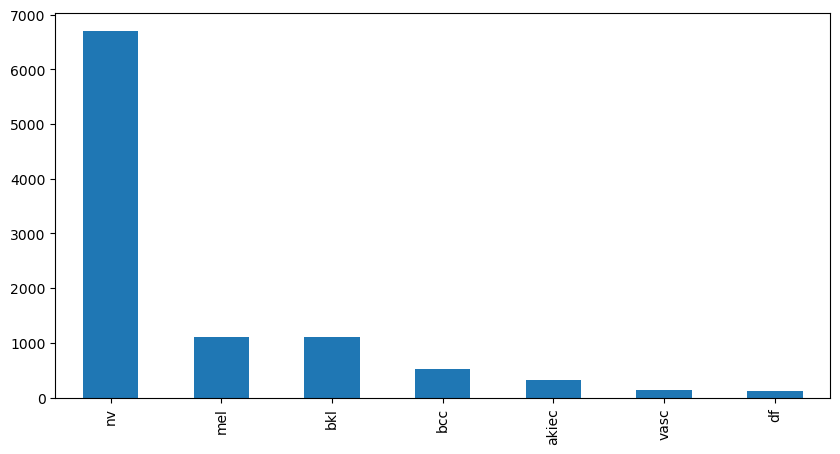

In [7]:
import matplotlib.pyplot as plt

#Plot the distribution of 7 different diagnostic categories
fig, ax1 = plt.subplots(1,1,figsize=(10, 5))
data['dx'].value_counts().plot(kind='bar',ax=ax1)

<AxesSubplot:>

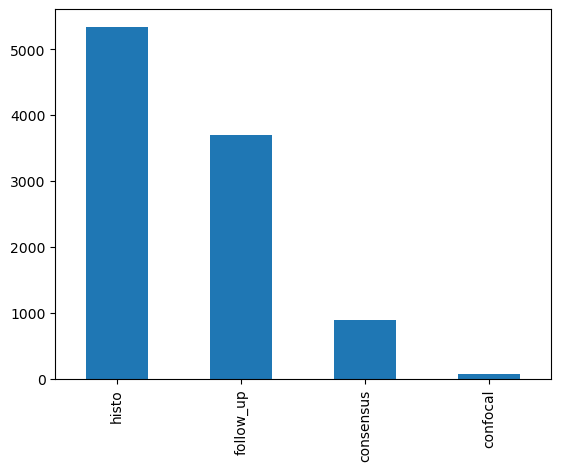

In [8]:
#Plot the distribution of 4 different technical validation field
data['dx_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

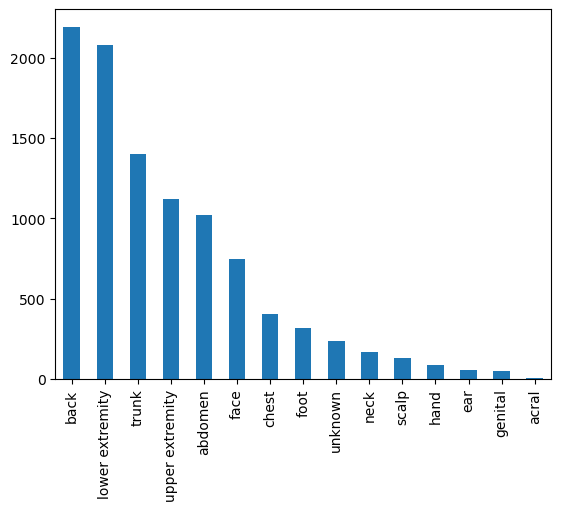

In [9]:
#Plot the distribution of localization field
data['localization'].value_counts().plot(kind='bar')

<AxesSubplot:>

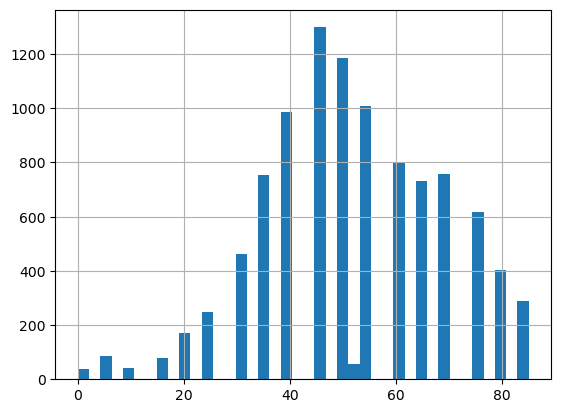

In [10]:
#Plot the distribution of age
data['age'].hist(bins=40)

<AxesSubplot:>

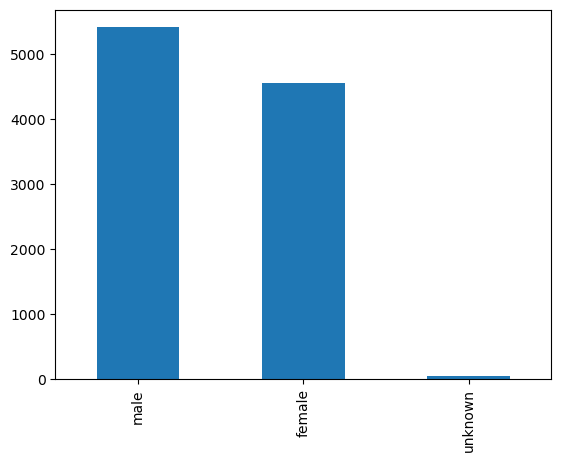

In [11]:
#Plot the distribution of sex
data['sex'].value_counts().plot(kind='bar')

In [12]:
#Delete duplicates

data_lesion_id = data.groupby('lesion_id').count()
data_image_id = data_lesion_id[data_lesion_id['image_id'] == 1]
data_image_id.reset_index(inplace = True)
data_image_id.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [13]:
def catch_duplicates(x):
    unique = list(data_image_id['lesion_id'])
    if x in unique:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
data['duplicates'] = data['lesion_id']
data['duplicates'] = data['duplicates'].apply(catch_duplicates)
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [14]:
data['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [15]:
data_filtered = data[data['duplicates'] == 'no_duplicates']
data_filtered.shape

(5514, 8)

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

#Divide the dataset into training and test sets
_, test_set = train_test_split(data, test_size=0.2, shuffle=True, random_state=42, stratify=data['dx'])
test_set.shape

(2003, 8)

In [17]:
def train_or_test(x):
    test = list(test_set['image_id'])
    if str(x) in test:
        return 'test'
    else:
        return 'train'

data['train_or_test'] = data['image_id']
data['train_or_test'] = data['train_or_test'].apply(train_or_test)
training_set = data[data['train_or_test'] == 'train']

training_set['dx'].value_counts()

nv       5364
mel       890
bkl       879
bcc       411
akiec     262
vasc      114
df         92
Name: dx, dtype: int64

In [18]:
test_set['dx'].value_counts()

nv       1341
mel       223
bkl       220
bcc       103
akiec      65
vasc       28
df         23
Name: dx, dtype: int64

In [19]:
import shutil

#Transfer images in the dataset to the related directory created before

data.set_index('image_id',inplace=True)

images_1 = os.listdir('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1')
images_2 = os.listdir('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2')

training_list = training_set['image_id']
val_list = test_set['image_id']

for image in training_list:
    filename = image + '.jpg'
    label = data.loc[image,'dx']
    if filename in images_1:
        source = os.path.join('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1',filename)
        direction = os.path.join(training_dir,label,filename)
        shutil.copyfile(source,direction)
    if filename in images_2:
        source = os.path.join('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2',filename)
        direction = os.path.join(training_dir,label,filename)
        shutil.copyfile(source,direction)
        
for image in val_list:
    filename = image + '.jpg'
    label = data.loc[image,'dx']
    if filename in images_1:
        source = os.path.join('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1',filename)
        direction = os.path.join(val_dir,label,filename)
        shutil.copyfile(source,direction)
    if filename in images_2:
        source = os.path.join('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2',filename)
        direction = os.path.join(val_dir,label,filename)
        shutil.copyfile(source,direction)

In [20]:
#Check

print(len(os.listdir('base_dir/training_dir/nv')))
print(len(os.listdir('base_dir/training_dir/mel')))
print(len(os.listdir('base_dir/training_dir/bkl')))
print(len(os.listdir('base_dir/training_dir/bcc')))
print(len(os.listdir('base_dir/training_dir/akiec')))
print(len(os.listdir('base_dir/training_dir/vasc')))
print(len(os.listdir('base_dir/training_dir/df')))
print('\n')
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

5364
890
879
411
262
114
92


1341
223
220
103
65
28
23


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data augmentation

diagnostic_categories = ['mel','bkl','bcc','akiec','vasc','df']

for category in diagnostic_categories:
    aug_dir = os.path.join(training_dir,'aug_dir')
    os.mkdir(aug_dir)
    img_dir = os.path.join(aug_dir,'img_dir')
    os.mkdir(img_dir)
    
    img_class = category
    img_list = os.listdir('base_dir/training_dir/' + img_class)
    
    for filename in img_list:
            source = os.path.join('base_dir/training_dir/' + img_class,filename)
            direction = os.path.join(img_dir,filename)
            shutil.copyfile(source,direction)
            
    save_path = 'base_dir/training_dir/' + img_class
    
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

    aug_datagen = datagen.flow_from_directory(aug_dir,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(150,150),
                                              batch_size=50)
    
    num_batches = int(np.ceil((6000-len(os.listdir(img_dir)))/50))

    for i in range(0,num_batches):
        imgs, labels = next(aug_datagen)
        
    shutil.rmtree('base_dir/training_dir/aug_dir')

Found 890 images belonging to 1 classes.
Found 879 images belonging to 1 classes.
Found 411 images belonging to 1 classes.
Found 262 images belonging to 1 classes.
Found 114 images belonging to 1 classes.
Found 92 images belonging to 1 classes.


In [22]:
#Data preprocessing

TRAINING_DIR = 'base_dir/training_dir'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

VAL_DIR = 'base_dir/val_dir'
validation_datagen = ImageDataGenerator(rescale=1./255)

training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=100
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=100
)

test_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(150,150),
    batch_size=1,
    shuffle=False
)

Found 38291 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.


In [23]:
#Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])

#Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [24]:
#Set the training parameters
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [25]:
#Adjust weights based on Melanoma type
print(validation_generator.class_indices)
class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel
    5: 1.0, # nv
    6: 1.0, # vasc
}

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [26]:
#Define a callback
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [27]:
#Train the model
history = model.fit(training_generator, epochs=25, steps_per_epoch=10, validation_data=validation_generator, verbose=1, validation_steps=2, class_weight=class_weights, callbacks=[checkpoint])

2023-02-14 23:26:25.515118: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27000000 exceeds 10% of free system memory.


Epoch 1/25


2023-02-14 23:26:27.589170: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27000000 exceeds 10% of free system memory.
2023-02-14 23:26:28.678746: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27000000 exceeds 10% of free system memory.
2023-02-14 23:26:29.849615: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27000000 exceeds 10% of free system memory.
2023-02-14 23:26:30.977309: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 27000000 exceeds 10% of free system memory.


10/10 [==============================] - ETA: 0s - loss: 5.2628 - accuracy: 0.1390
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to model.h5
10/10 [==============================] - 23s 1s/step - loss: 5.2628 - accuracy: 0.1390 - val_loss: 1.9506 - val_accuracy: 0.1000
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 2.4001 - accuracy: 0.1410
Epoch 2: val_accuracy improved from 0.10000 to 0.14500, saving model to model.h5
10/10 [==============================] - 13s 1s/step - loss: 2.4001 - accuracy: 0.1410 - val_loss: 2.0930 - val_accuracy: 0.1450
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 2.4568 - accuracy: 0.1630
Epoch 3: val_accuracy did not improve from 0.14500
10/10 [==============================] - 13s 1s/step - loss: 2.4568 - accuracy: 0.1630 - val_loss: 2.5388 - val_accuracy: 0.0900
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 2.4305 - accuracy: 0.1570
Epoch 4: val_accuracy did not improve 

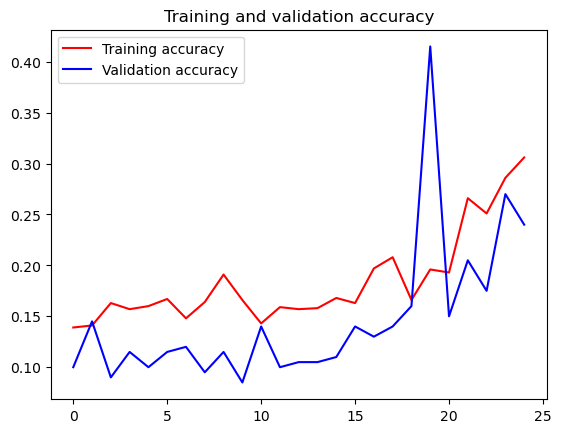

<Figure size 640x480 with 0 Axes>

In [28]:
#Plot the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [29]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

#Instantiates InceptionV3 architecture
base_model = InceptionV3(weights='imagenet', include_top=False)

base = base_model.output
#Add a global spatial average pooling layer
vectors = tf.keras.layers.GlobalAveragePooling2D()(base)
#Add a fully-connected layer
dense = tf.keras.layers.Dense(512, activation='relu')(vectors)
#Add a logistic layer
predictions = tf.keras.layers.Dense(7, activation='softmax')(dense)

#Build the model
model_2 = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model_2.summary()   #To see how many layers to be frozen

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_4 (Conv2D)              (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d_4[0][0]']               
 alization)                  

In [30]:
#Freeze the first 249 layers and unfreeze the rest
for layer in model_2.layers[:249]:
   layer.trainable = False
for layer in model_2.layers[249:]:
   layer.trainable = True

In [31]:
from tensorflow.keras.optimizers import SGD

model_2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.0001,momentum=0.9), metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [32]:
history_2 = model_2.fit(training_generator, epochs=25, steps_per_epoch=10, validation_data=validation_generator, verbose=1, validation_steps=2, class_weight=class_weights, callbacks=[checkpoint])

Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 2.6945 - accuracy: 0.1330
Epoch 1: val_accuracy did not improve from 0.41500
10/10 [==============================] - 22s 1s/step - loss: 2.6945 - accuracy: 0.1330 - val_loss: 2.4686 - val_accuracy: 0.0700
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 2.5451 - accuracy: 0.1510
Epoch 2: val_accuracy did not improve from 0.41500
10/10 [==============================] - 13s 1s/step - loss: 2.5451 - accuracy: 0.1510 - val_loss: 2.3180 - val_accuracy: 0.0800
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 2.4578 - accuracy: 0.1560
Epoch 3: val_accuracy did not improve from 0.41500
10/10 [==============================] - 14s 1s/step - loss: 2.4578 - accuracy: 0.1560 - val_loss: 2.2484 - val_accuracy: 0.0800
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 2.4436 - accuracy: 0.1740
Epoch 4: val_accuracy did not improve from 0.41500
10/10 [==========================

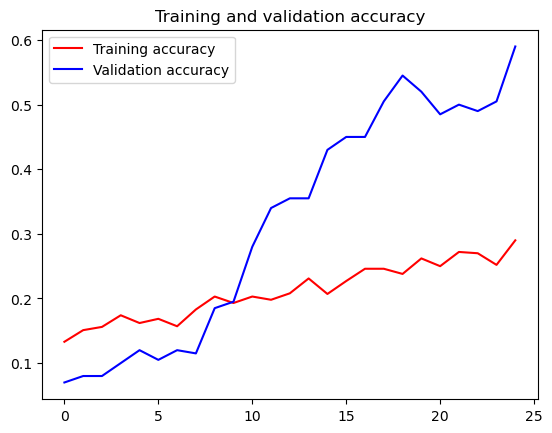

<Figure size 640x480 with 0 Axes>

In [33]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [34]:
from tensorflow.keras.applications.mobilenet import MobileNet

#Instantiates MobileNet architecture
base_model = MobileNet()

base = base_model.layers[-6].output
vectors = tf.keras.layers.GlobalAveragePooling2D()(base)
#Add a Dropout layer
dropout = tf.keras.layers.Dropout(0.25)(vectors)
predictions = tf.keras.layers.Dense(7, activation='softmax')(dropout)

model_3 = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model_3.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128  

In [35]:
for layer in model_3.layers[:-23]:
    layer.trainable = False

In [36]:
from tensorflow.keras.optimizers import Adam

model_3.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [37]:
history_3 = model_3.fit(training_generator, epochs=25, steps_per_epoch=10, validation_data=validation_generator, verbose=1, validation_steps=2, class_weight=class_weights, callbacks=[checkpoint])

Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 4.5679 - accuracy: 0.3370
Epoch 1: val_accuracy did not improve from 0.59000
10/10 [==============================] - 16s 1s/step - loss: 4.5679 - accuracy: 0.3370 - val_loss: 4.3681 - val_accuracy: 0.5450
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 2.0124 - accuracy: 0.4130
Epoch 2: val_accuracy improved from 0.59000 to 0.69000, saving model to model.h5
10/10 [==============================] - 14s 1s/step - loss: 2.0124 - accuracy: 0.4130 - val_loss: 5.1064 - val_accuracy: 0.6900
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 1.6419 - accuracy: 0.4800
Epoch 3: val_accuracy did not improve from 0.69000
10/10 [==============================] - 13s 1s/step - loss: 1.6419 - accuracy: 0.4800 - val_loss: 3.2518 - val_accuracy: 0.5950
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 1.5220 - accuracy: 0.5380
Epoch 4: val_accuracy did not improve from 0.69000
10/

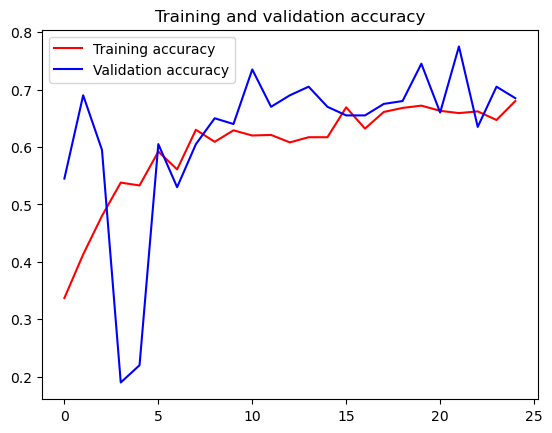

<Figure size 640x480 with 0 Axes>

In [38]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [39]:
shutil.rmtree('base_dir')

In addition to **documentation** and **TensorFlow Developer Professional Certificate Specialization**,
references I used for this notebook are:
* https://www.kaggle.com/code/burakarslan38/cilt-kanserini-alg-layan-yapay-zeka-algoritmas
* https://www.kaggle.com/code/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy